In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = '/Users/ileanaleticia/Library/Mobile Documents/com~apple~CloudDocs/Analysis Projects/Movies-ETL'

In [3]:
f'{file_dir}/wikipedia.movies.json'

'/Users/ileanaleticia/Library/Mobile Documents/com~apple~CloudDocs/Analysis Projects/Movies-ETL/wikipedia.movies.json'

In [4]:
with open(f'{file_dir}/wikipedia.movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

In [6]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [8]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [9]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory = False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [10]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [12]:
kaggle_metadata.sample()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13427,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,434306,tt0119211,en,Going to Kansas City,An exchange student from Finland arrives in Ka...,...,1998-07-31,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Going to Kansas City,False,5.0,2.0


In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [14]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [15]:
ratings.sample()

,userId,movieId,rating,timestamp
2263600,23485,52722,3.5,1440731518


In [16]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [17]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [19]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [20]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [22]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

In [23]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [24]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

In [25]:
wiki_movies_df[wiki_movies_df['Adaptation by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
536,https://en.wikipedia.org/wiki/The_Last_of_the_...,1992,https://www.imdb.com/title/tt0104691/,The Last of the Mohicans,Michael Mann,"[Michael Mann, Hunt Lowry]","[Michael Mann, Christopher Crowe]",NaN,"[The Last of the Mohicans, by, James Fenimore ...","[Daniel Day-Lewis, Madeleine Stowe, Jodhi May]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,https://en.wikipedia.org/wiki/The_Nightmare_Be...,1993,https://www.imdb.com/title/tt0107688/,The Nightmare Before Christmas,Henry Selick,"[Tim Burton, Denise Di Novi]",Caroline Thompson,NaN,"[Story and characters, by Tim Burton]","[Danny Elfman, Chris Sarandon, Catherine O'Har...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
wiki_movies_df[wiki_movies_df['Also known as'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
69,https://en.wikipedia.org/wiki/Eyes_on_the_Prize,1990,https://www.imdb.com/title/tt0092999/,Eyes on the Prize,"[Orlando Bagwell, Sheila Curran Bernard, Calli...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,https://en.wikipedia.org/wiki/Night_Watch_(199...,1995,https://www.imdb.com/title/tt0113984/,Nightwatch,David Jackson,NaN,NaN,NaN,NaN,"[Pierce Brosnan, ,, Alexandra Paul]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
wiki_movies_df[wiki_movies_df['Animation by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
1380,https://en.wikipedia.org/wiki/Runaway_Brain,1995,https://www.imdb.com/title/tt0114308/,Runaway Brain,Chris Bailey,Ron Tippe,NaN,Tim Hauser,NaN,"[Wayne Allwine, Russi Taylor, Kelsey Grammer, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2035,https://en.wikipedia.org/wiki/Pullet_Surprise_...,1997,https://www.imdb.com/title/tt0119963/,Pullet Surprise,Darrell Van Citters,Chuck Jones,NaN,"[Stephen Fossatti, Darrell Van Citters]",NaN,"[Frank Gorshin, Stan Freberg]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
wiki_movies_df[wiki_movies_df['Audio format'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,https://en.wikipedia.org/wiki/Daughter_of_Dark...,1990,https://www.imdb.com/title/tt0099368/,Daughter of Darkness,Stuart Gordon,NaN,NaN,NaN,NaN,"[Anthony Perkins, Mia Sara, Robert Reynolds, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,https://en.wikipedia.org/wiki/Deceptions,1990,https://www.imdb.com/title/tt0099390/,Deceptions,Ruben Preuss,NaN,NaN,NaN,NaN,"[Harry Hamlin, Robert Davi, Nicollette Sherida...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,https://en.wikipedia.org/wiki/Decoration_Day_(...,1990,https://www.imdb.com/title/tt0099391/,Decoration Day,Robert Markowitz,NaN,NaN,NaN,NaN,"[James Garner, Judith Ivey, Ruby Dee, Bill Cob...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,"https://en.wikipedia.org/wiki/20,000_Leagues_U...",1997,https://www.imdb.com/title/tt0118248/,"20,000 Leagues Under the Sea",Rod Hardy,NaN,Brian Nelson,NaN,"[Twenty Thousand Leagues Under the Sea, by, Ju...","[Michael Caine, Patrick Dempsey, Mia Sara, Bry...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,https://en.wikipedia.org/wiki/Alien_Nation:_Th...,1997,https://www.imdb.com/title/tt0118582/,Alien Nation: The Udara Legacy,Kenneth Johnson,NaN,NaN,NaN,NaN,"[Gary Graham, Eric Pierpoint, Michele Scarabel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,https://en.wikipedia.org/wiki/Asteroid_(film),1997,https://www.imdb.com/title/tt0118261/,Asteroid,Bradford May,NaN,NaN,NaN,NaN,"[Michael Biehn, Annabella Sciorra]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,https://en.wikipedia.org/wiki/Crowned_and_Dang...,1997,https://www.imdb.com/title/tt0123020/,Crowned and Dangerous,Christopher Leitch,NaN,NaN,NaN,NaN,"[Yasmine Bleeth, Cassidy Rae, George Eads, Jil...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wiki_movies_df[wiki_movies_df['Based on'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,https://en.wikipedia.org/wiki/Another_48_Hrs.,1990,https://www.imdb.com/title/tt0099044/,Another 48 Hrs.,Walter Hill,"[Lawrence Gordon, Robert D. Wachs]","[John Fasano, Jeb Stuart, Larry Gross]",Fred Braughton,"[Characters by, Roger Spottiswoode, Walter Hil...","[Eddie Murphy, Nick Nolte, Brion James, Ed O'R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,https://en.wikipedia.org/wiki/Awakenings,1990,https://www.imdb.com/title/tt0099077/,Awakenings,Penny Marshall,"[Walter F. Parkes, Lawrence Lasker]",Steven Zaillian,NaN,"[Awakenings, by, Oliver Sacks]","[Robert De Niro, Robin Williams, John Heard, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,https://en.wikipedia.org/wiki/If_Beale_Street_...,2018,https://www.imdb.com/title/tt7125860/,If Beale Street Could Talk,Barry Jenkins,"[Dede Gardner, Jeremy Kleiner, Adele Romanski,...",Barry Jenkins,NaN,"[If Beale Street Could Talk, by, James Baldwin]","[KiKi Layne, Stephan James, Colman Domingo, Te...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,https://en.wikipedia.org/wiki/Mary_Poppins_Ret...,2018,https://www.imdb.com/title/tt5028340/,Mary Poppins Returns,Rob Marshall,"[Rob Marshall, John DeLuca, Marc Platt]",David Magee,"[David Magee, Rob Marshall, John DeLuca]","[Mary Poppins, by, P. L. Travers, [1]]","[Emily Blunt, Lin-Manuel Miranda, Ben Whishaw,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7070,https://en.wikipedia.org/wiki/Aquaman_(film),2018,https://www.imdb.com/title/tt1477834/,Aquaman,James Wan,"[Peter Safran, Rob Cowan]","[David Leslie Johnson-McGoldrick, Will Beall]","[Geoff Johns, James Wan, Will Beall]","[Aquaman, by, Paul Norris, Mort Weisinger]","[Jason Momoa, Amber Heard, Willem Dafoe, Patri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7071,https://en.wikipedia.org/wiki/Bumblebee_(film),2018,https://www.imdb.com/title/tt4701182/,Bumblebee,Travis Knight,"[Lorenzo di Bonaventura, Tom DeSanto, Don Murp...",NaN,NaN,"[Transformers, by, Hasbro]","[Hailee Steinfeld, John Cena, Jorge Lendeborg ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wiki_movies_df[wiki_movies_df['Box office'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
wiki_movies_df[wiki_movies_df['Budget'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
wiki_movies_df[wiki_movies_df['Cantonese'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6460,https://en.wikipedia.org/wiki/Ip_Man_3,2016,https://www.imdb.com/title/tt2888046/,Ip Man 3,Wilson Yip,Raymond Wong,NaN,NaN,NaN,"[Donnie Yen, Zhang Jin, Lynn Hung, Patrick Tam...",...,NaN,NaN,"[Jip, 6, Man, 6, Saam, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
wiki_movies_df[wiki_movies_df['Chinese'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6624,https://en.wikipedia.org/wiki/Rock_Dog,2017,https://www.imdb.com/title/tt2822672/,Rock Dog,Ash Brannon,"[Amber Wang, David B. Miller, Rob Feng, Joyce ...","[Ash Brannon, Kurt Voelker]","[Ash Brannon, Zheng Jun]","[Tibetan Rock Dog, by Zheng Jun]","[Luke Wilson, Eddie Izzard, J. K. Simmons, Lew...",...,NaN,NaN,NaN,摇滚藏獒,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
wiki_movies_df[wiki_movies_df['Cinematography'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
wiki_movies_df[wiki_movies_df['Color process'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
1380,https://en.wikipedia.org/wiki/Runaway_Brain,1995,https://www.imdb.com/title/tt0114308/,Runaway Brain,Chris Bailey,Ron Tippe,NaN,Tim Hauser,NaN,"[Wayne Allwine, Russi Taylor, Kelsey Grammer, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
wiki_movies_df[wiki_movies_df['Composer(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,https://en.wikipedia.org/wiki/To_Grandmother%2...,1992,https://www.imdb.com/title/tt0105606/,To Grandmother's House We Go,Jeff Franklin,NaN,NaN,NaN,NaN,"[Mary-Kate Olsen, Ashley Olsen]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,https://en.wikipedia.org/wiki/In_Search_of_Dr....,1994,https://www.imdb.com/title/tt0110121/,In Search of Dr. Seuss,Vincent Paterson,NaN,NaN,NaN,NaN,"[Kathy Najimy, Matt Frewer, Christopher Lloyd,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,https://en.wikipedia.org/wiki/Is_There_Life_Ou...,1994,https://www.imdb.com/title/tt0110160/,Is There Life Out There?,David Jones,NaN,NaN,NaN,NaN,"[Reba McEntire, Keith Carradine, Genia Michael...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,https://en.wikipedia.org/wiki/Scooby-Doo_in_Ar...,1994,https://www.imdb.com/title/tt0192578/,Scooby-Doo! in Arabian Nights,"[Jun Falkenstein, Joanna Romersa]",NaN,NaN,NaN,"[Scooby-Doo, by, Joe Ruby, and, Ken Spears, Yo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,Jonathan Winfrey,NaN,NaN,NaN,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,https://en.wikipedia.org/wiki/The_Odyssey_(TV_...,1997,https://www.imdb.com/title/tt0118414/,The Odyssey,Andrei Konchalovsky,NaN,NaN,NaN,"[Odyssey, by, Homer]","[Armand Assante, Greta Scacchi, Isabella Rosse...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,https://en.wikipedia.org/wiki/Police_2020,1997,https://www.imdb.com/title/tt0216978/,Police 2020,David Richards,NaN,NaN,NaN,NaN,"[Liam Cunningham, Rachel Davies, Nick Reding, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,Phillip J. Roth,NaN,NaN,NaN,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
wiki_movies_df[wiki_movies_df['Country'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
wiki_movies_df[wiki_movies_df['Country of origin'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3758,https://en.wikipedia.org/wiki/Getting_Played,2005,https://www.imdb.com/title/tt0396032/,Getting Played,David Silberg,NaN,NaN,NaN,NaN,"[Vivica A. Fox, Bill Bellamy, Carmen Electra, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,https://en.wikipedia.org/wiki/Disaster_Zone:_V...,2006,https://www.imdb.com/title/tt0463948/,Disaster Zone: Volcano in New York,Robert Lee,NaN,NaN,NaN,NaN,"[Costas Mandylor, Alexandra Paul, Michael Iron...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
wiki_movies_df[wiki_movies_df['Created by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
52,https://en.wikipedia.org/wiki/Decoration_Day_(...,1990,https://www.imdb.com/title/tt0099391/,Decoration Day,Robert Markowitz,NaN,NaN,NaN,NaN,"[James Garner, Judith Ivey, Ruby Dee, Bill Cob...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,https://en.wikipedia.org/wiki/O_Pioneers!_(film),1992,https://www.imdb.com/title/tt0105038/,O Pioneers!,Glenn Jordan,NaN,NaN,NaN,NaN,"[Jessica Lange, David Strathairn, Tom Aldredge]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,https://en.wikipedia.org/wiki/Alien_Nation:_Da...,1994,https://www.imdb.com/title/tt0109078/,Alien Nation: Dark Horizon,Kenneth Johnson,NaN,NaN,NaN,NaN,"[Gary Graham, Eric Pierpoint, Michele Scarabel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,https://en.wikipedia.org/wiki/Gary_Larson%27s_...,1994,https://www.imdb.com/title/tt0109873/,Tales from the Far Side,Marv Newland,NaN,NaN,NaN,NaN,"[Kathleen Barr, Doug Parker, Lee Tockar, Dale ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,https://en.wikipedia.org/wiki/Truman_(1995_film),1995,https://www.imdb.com/title/tt0114738/,Truman,Frank Pierson,NaN,Thomas Rickman,NaN,"[Truman, by, David McCullough]","[Gary Sinise, Diana Scarwid, Tony Goldwyn]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,https://en.wikipedia.org/wiki/Alien_Nation:_Mi...,1996,https://www.imdb.com/title/tt0115504/,Alien Nation: Millennium,Kenneth Johnson,NaN,NaN,NaN,NaN,"[Gary Graham, Eric Pierpoint, Michele Scarabel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,https://en.wikipedia.org/wiki/Alien_Nation:_Th...,1996,https://www.imdb.com/title/tt0115505/,Alien Nation: The Enemy Within,Kenneth Johnson,NaN,NaN,NaN,NaN,"[Gary Graham, Eric Pierpoint, Michele Scarabel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,https://en.wikipedia.org/wiki/Alien_Nation:_Th...,1997,https://www.imdb.com/title/tt0118582/,Alien Nation: The Udara Legacy,Kenneth Johnson,NaN,NaN,NaN,NaN,"[Gary Graham, Eric Pierpoint, Michele Scarabel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,https://en.wikipedia.org/wiki/Police_2020,1997,https://www.imdb.com/title/tt0216978/,Police 2020,David Richards,NaN,NaN,NaN,NaN,"[Liam Cunningham, Rachel Davies, Nick Reding, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2115,https://en.wikipedia.org/wiki/What_the_Deaf_Ma...,1997,https://www.imdb.com/title/tt0120498/,What the Deaf Man Heard,John Kent Harrison,NaN,NaN,NaN,NaN,"[Matthew Modine, James Earl Jones]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
wiki_movies_df[wiki_movies_df['Country of origin'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3758,https://en.wikipedia.org/wiki/Getting_Played,2005,https://www.imdb.com/title/tt0396032/,Getting Played,David Silberg,NaN,NaN,NaN,NaN,"[Vivica A. Fox, Bill Bellamy, Carmen Electra, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,https://en.wikipedia.org/wiki/Disaster_Zone:_V...,2006,https://www.imdb.com/title/tt0463948/,Disaster Zone: Volcano in New York,Robert Lee,NaN,NaN,NaN,NaN,"[Costas Mandylor, Alexandra Paul, Michael Iron...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
wiki_movies_df[wiki_movies_df['Directed by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
wiki_movies_df[wiki_movies_df['Director'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
wiki_movies_df[wiki_movies_df['Distributed by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
wiki_movies_df[wiki_movies_df['Distributor'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,https://en.wikipedia.org/wiki/Daughter_of_Dark...,1990,https://www.imdb.com/title/tt0099368/,Daughter of Darkness,Stuart Gordon,NaN,NaN,NaN,NaN,"[Anthony Perkins, Mia Sara, Robert Reynolds, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,https://en.wikipedia.org/wiki/Getting_Played,2005,https://www.imdb.com/title/tt0396032/,Getting Played,David Silberg,NaN,NaN,NaN,NaN,"[Vivica A. Fox, Bill Bellamy, Carmen Electra, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,https://en.wikipedia.org/wiki/Andy_Warhol:_A_D...,2006,https://www.imdb.com/title/tt0862644/,Andy Warhol: A Documentary Film,Ric Burns,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,https://en.wikipedia.org/wiki/Disaster_Zone:_V...,2006,https://www.imdb.com/title/tt0463948/,Disaster Zone: Volcano in New York,Robert Lee,NaN,NaN,NaN,NaN,"[Costas Mandylor, Alexandra Paul, Michael Iron...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
wiki_movies_df[wiki_movies_df['Edited by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
wiki_movies_df[wiki_movies_df['Editor(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,https://en.wikipedia.org/wiki/Andy_Warhol:_A_D...,2006,https://www.imdb.com/title/tt0862644/,Andy Warhol: A Documentary Film,Ric Burns,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
wiki_movies_df[wiki_movies_df['Executive producer(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,https://en.wikipedia.org/wiki/Daughter_of_Dark...,1990,https://www.imdb.com/title/tt0099368/,Daughter of Darkness,Stuart Gordon,NaN,NaN,NaN,NaN,"[Anthony Perkins, Mia Sara, Robert Reynolds, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,https://en.wikipedia.org/wiki/The_Thirteenth_Year,1999,https://www.imdb.com/title/tt0200208/,The Thirteenth Year,Duwayne Dunham,NaN,NaN,NaN,NaN,"[Chez Starbuck, Justin Jon Ross, Courtnee Drap...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2638,https://en.wikipedia.org/wiki/For_Love_or_Coun...,2000,https://www.imdb.com/title/tt0236285/,For Love or Country: The Arturo Sandoval Story,Joseph Sargent,NaN,NaN,NaN,NaN,"[Andy García, Mía Maestro, Gloria Estefan, Dav...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,https://en.wikipedia.org/wiki/Carrie_(2002_film),2002,https://www.imdb.com/title/tt0319970/,Carrie,David Carson,NaN,Bryan Fuller,NaN,"[Carrie, by, Stephen King]","[Angela Bettis, Patricia Clarkson, Rena Sofer,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
wiki_movies_df[wiki_movies_df['Followed by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,https://en.wikipedia.org/wiki/Sometimes_They_C...,1991,https://www.imdb.com/title/tt0102960/,Sometimes They Come Back,Tom McLoughlin,NaN,NaN,NaN,"[Sometimes They Come Back, (short story) by, S...","[Tim Matheson, Brooke Adams, Robert Rusler]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,https://en.wikipedia.org/wiki/Revenge_of_the_N...,1992,https://www.imdb.com/title/tt0105251/,Revenge of the Nerds III: The Next Generation,Roland Mesa,NaN,NaN,NaN,"[Characters, by Tim Metcalfe, Miguel Tejada-Fl...","[Robert Carradine, Curtis Armstrong, Ted McGin...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,https://en.wikipedia.org/wiki/Another_Midnight...,1994,https://www.imdb.com/title/tt0109138/,Another Midnight Run,James Frawley,NaN,NaN,NaN,"[Characters, by, George Gallo]","[Christopher McDonald, Cathy Moriarty, Jeffrey...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,https://en.wikipedia.org/wiki/Midnight_Runaround,1994,https://www.imdb.com/title/tt0110511/,Midnight Runaround,Frank De Palma,NaN,NaN,NaN,"[Characters, by, George Gallo]","[Christopher McDonald, Kyle Secor, Rebecca Cro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,https://en.wikipedia.org/wiki/The_Computer_Wor...,1995,https://www.imdb.com/title/tt0112709/,The Computer Wore Tennis Shoes,Peyton Reed,NaN,NaN,NaN,"[Screenplay by, Joseph L. McEveety]","[Kirk Cameron, Larry Miller, Dean Jones, Jason...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,https://en.wikipedia.org/wiki/Escape_to_Witch_...,1995,https://www.imdb.com/title/tt0112985/,Escape to Witch Mountain,Peter Rader,NaN,Peter Rader,NaN,"[Escape to Witch Mountain, by, Alexander Key]","[Robert Vaughn, Elisabeth Moss, Erik von Dette...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,https://en.wikipedia.org/wiki/Dallas:_J.R._Ret...,1996,https://www.imdb.com/title/tt0116007/,Dallas: J.R. Returns,Leonard Katzman,NaN,Leonard Katzman,NaN,"[Characters created by, David Jacobs]","[Rosalind Allen, Christopher Demetral, Patrick...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1704,https://en.wikipedia.org/wiki/Sabrina_the_Teen...,1996,https://www.imdb.com/title/tt0117534/,Sabrina the Teenage Witch,Tibor Takács,NaN,NaN,NaN,"[Sabrina the Teenage Witch, by, Dan DeCarlo, G...","[Melissa Joan Hart, Sherry Miller, Charlene Fe...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
wiki_movies_df[wiki_movies_df['French'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
1891,https://en.wikipedia.org/wiki/The_Fifth_Element,1997,https://www.imdb.com/title/tt0119116/,The Fifth Element,Luc Besson,Patrice Ledoux,"[Luc Besson, Robert Mark Kamen]",Luc Besson,NaN,"[Bruce Willis, Gary Oldman, Ian Holm, Chris Tu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
wiki_movies_df[wiki_movies_df['Genre'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,https://en.wikipedia.org/wiki/Atomic_Train,1999,https://www.imdb.com/title/tt0144039/,Atomic Train,"[David Jackson, Dick Lowry]",NaN,NaN,NaN,NaN,"[Rob Lowe, Kristin Davis, Esai Morales, John F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2548,https://en.wikipedia.org/wiki/That_Championshi...,1999,https://www.imdb.com/title/tt0192671/,That Championship Season,Paul Sorvino,NaN,NaN,NaN,NaN,"[Vincent D'Onofrio, Terry Kinney, Tony Shalhou...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,https://en.wikipedia.org/wiki/Carrie_(2002_film),2002,https://www.imdb.com/title/tt0319970/,Carrie,David Carson,NaN,Bryan Fuller,NaN,"[Carrie, by, Stephen King]","[Angela Bettis, Patricia Clarkson, Rena Sofer,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
wiki_movies_df[wiki_movies_df['Hangul'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
3417,https://en.wikipedia.org/wiki/Wonderful_Days_(...,2003,https://www.imdb.com/title/tt0353014/,Wonderful Days,Kim Moon-saeng,"[Hwang K. S., Kyeong Hag Lee]",NaN,NaN,NaN,"[Korean, Ji Hoon Choi, Yeong Seon Eun, In Seon...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4242,https://en.wikipedia.org/wiki/Shark_Bait,2006,https://www.imdb.com/title/tt0820142/,Shark Bait (AKA: The Reef: Shark Bait),"[Howard E. Baker, John Fox]",NaN,NaN,NaN,NaN,"[Freddie Prinze, Jr., Evan Rachel Wood, Donal ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
wiki_movies_df[wiki_movies_df['Hebrew'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6866,https://en.wikipedia.org/wiki/Foxtrot_(2017_film),2018,https://www.imdb.com/title/tt6896536/,Foxtrot,Samuel Maoz,"[Eitan Mansuri, [, he, ]]",NaN,NaN,NaN,"[Lior Ashkenazi, Sarah Adler]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,פוֹקְסטְרוֹט,NaN


In [53]:
wiki_movies_df[wiki_movies_df['Hepburn'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6397,https://en.wikipedia.org/wiki/When_Marnie_Was_...,2015,https://www.imdb.com/title/tt3398268/,When Marnie Was There,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Masashi Andō, Keiko Niwa, Hiromasa Yonebayashi]",NaN,"[When Marnie Was There, by, Joan G. Robinson]","[Sara Takatsuki, Kasumi Arimura]",...,Omoide no Mānī,Marnie of [my] Memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6833,https://en.wikipedia.org/wiki/Mary_and_the_Wit...,2018,https://www.imdb.com/title/tt6336356/,Mary and The Witch's Flower,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Riko Sakaguchi, Hiromasa Yonebayashi]",NaN,"[The Little Broomstick, by, Mary Stewart, [1]]","[Hana Sugisaki, Yūki Amami, Fumiyo Kohinata]",...,Meari to Majo no Hana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7013,https://en.wikipedia.org/wiki/My_Hero_Academia...,2018,https://www.imdb.com/title/tt7745068/,My Hero Academia: Two Heroes,Kenji Nagasaki,"[Yoshihiro Oyabu, Koji Nagai, Wakana Okamura, ...",NaN,NaN,"[My Hero Academia, by, Kōhei Horikoshi]",NaN,...,Boku no Hīrō Akademia THE MOVIE: Futari no Hīrō,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Shoplifters,2018,https://www.imdb.com/title/tt8075192/,Shoplifters,Hirokazu Kore-eda,"[Matsuzaki Kaoru, Yose Akihiko, Taguchi Hijiri]",NaN,NaN,NaN,"[Lily Franky, Sakura Ando, Mayu Matsuoka, Kair...",...,Manbiki Kazoku,Shoplifting Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
wiki_movies_df[wiki_movies_df['Japanese'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6397,https://en.wikipedia.org/wiki/When_Marnie_Was_...,2015,https://www.imdb.com/title/tt3398268/,When Marnie Was There,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Masashi Andō, Keiko Niwa, Hiromasa Yonebayashi]",NaN,"[When Marnie Was There, by, Joan G. Robinson]","[Sara Takatsuki, Kasumi Arimura]",...,Omoide no Mānī,Marnie of [my] Memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6833,https://en.wikipedia.org/wiki/Mary_and_the_Wit...,2018,https://www.imdb.com/title/tt6336356/,Mary and The Witch's Flower,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Riko Sakaguchi, Hiromasa Yonebayashi]",NaN,"[The Little Broomstick, by, Mary Stewart, [1]]","[Hana Sugisaki, Yūki Amami, Fumiyo Kohinata]",...,Meari to Majo no Hana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7013,https://en.wikipedia.org/wiki/My_Hero_Academia...,2018,https://www.imdb.com/title/tt7745068/,My Hero Academia: Two Heroes,Kenji Nagasaki,"[Yoshihiro Oyabu, Koji Nagai, Wakana Okamura, ...",NaN,NaN,"[My Hero Academia, by, Kōhei Horikoshi]",NaN,...,Boku no Hīrō Akademia THE MOVIE: Futari no Hīrō,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Shoplifters,2018,https://www.imdb.com/title/tt8075192/,Shoplifters,Hirokazu Kore-eda,"[Matsuzaki Kaoru, Yose Akihiko, Taguchi Hijiri]",NaN,NaN,NaN,"[Lily Franky, Sakura Ando, Mayu Matsuoka, Kair...",...,Manbiki Kazoku,Shoplifting Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
wiki_movies_df[wiki_movies_df['Label'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
wiki_movies_df[wiki_movies_df['Language'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
wiki_movies_df[wiki_movies_df['Length'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
wiki_movies_df[wiki_movies_df['Literally'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6397,https://en.wikipedia.org/wiki/When_Marnie_Was_...,2015,https://www.imdb.com/title/tt3398268/,When Marnie Was There,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Masashi Andō, Keiko Niwa, Hiromasa Yonebayashi]",NaN,"[When Marnie Was There, by, Joan G. Robinson]","[Sara Takatsuki, Kasumi Arimura]",...,Omoide no Mānī,Marnie of [my] Memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Shoplifters,2018,https://www.imdb.com/title/tt8075192/,Shoplifters,Hirokazu Kore-eda,"[Matsuzaki Kaoru, Yose Akihiko, Taguchi Hijiri]",NaN,NaN,NaN,"[Lily Franky, Sakura Ando, Mayu Matsuoka, Kair...",...,Manbiki Kazoku,Shoplifting Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
wiki_movies_df[wiki_movies_df['Mandarin'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
860,https://en.wikipedia.org/wiki/The_Wedding_Banquet,1993,https://www.imdb.com/title/tt0107156/,The Wedding Banquet,Ang Lee,"[Ang Lee, Ted Hope, James Schamus]",NaN,NaN,NaN,"[Ah-Leh Gua, Sihung Lung, May Chin, Winston Ch...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,"https://en.wikipedia.org/wiki/East_Palace,_Wes...",1996,https://www.imdb.com/title/tt0119007/,"East Palace, West Palace",Zhang Yuan,"[Christophe Jung, Christophe Ménager, Zhang Yu...",NaN,NaN,NaN,"[Si Han, Hu Jun, Zhao Wei]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,https://en.wikipedia.org/wiki/Ip_Man_3,2016,https://www.imdb.com/title/tt2888046/,Ip Man 3,Wilson Yip,Raymond Wong,NaN,NaN,NaN,"[Donnie Yen, Zhang Jin, Lynn Hung, Patrick Tam...",...,NaN,NaN,"[Jip, 6, Man, 6, Saam, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6617,https://en.wikipedia.org/wiki/The_Great_Wall_(...,2017,https://www.imdb.com/title/tt2034800/,The Great Wall,Zhang Yimou,"[Thomas Tull, Charles Roven, Jon Jashni, Peter...","[Carlo Bernard, Doug Miro, Tony Gilroy]","[Max Brooks, Edward Zwick, Marshall Herskovitz]",NaN,"[Matt Damon, Jing Tian, Pedro Pascal, Willem D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
wiki_movies_df[wiki_movies_df['McCune–Reischauer'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
3417,https://en.wikipedia.org/wiki/Wonderful_Days_(...,2003,https://www.imdb.com/title/tt0353014/,Wonderful Days,Kim Moon-saeng,"[Hwang K. S., Kyeong Hag Lee]",NaN,NaN,NaN,"[Korean, Ji Hoon Choi, Yeong Seon Eun, In Seon...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4242,https://en.wikipedia.org/wiki/Shark_Bait,2006,https://www.imdb.com/title/tt0820142/,Shark Bait (AKA: The Reef: Shark Bait),"[Howard E. Baker, John Fox]",NaN,NaN,NaN,NaN,"[Freddie Prinze, Jr., Evan Rachel Wood, Donal ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
wiki_movies_df[wiki_movies_df['Music by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,Larry Cohen,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",NaN,NaN,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
wiki_movies_df[wiki_movies_df['Narrated by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,https://en.wikipedia.org/wiki/Eyes_on_the_Prize,1990,https://www.imdb.com/title/tt0092999/,Eyes on the Prize,"[Orlando Bagwell, Sheila Curran Bernard, Calli...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,https://en.wikipedia.org/wiki/Frankenstein_Unb...,1990,https://www.imdb.com/title/tt0099612/,Frankenstein Unbound,Roger Corman,"[Jay Cassidy, Roger Corman, Kobi Jaeger, Laura...",NaN,NaN,"[Frankenstein Unbound, by, Brian Aldiss]","[John Hurt, Raul Julia, Bridget Fonda, Jason P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,https://en.wikipedia.org/wiki/It_(1990_film),1990,https://www.imdb.com/title/tt0099864/,Stephen King's It,Tommy Lee Wallace,NaN,NaN,NaN,"[It, by, Stephen King]","[Harry Anderson, Dennis Christopher, Richard M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,https://en.wikipedia.org/wiki/The_Long_Walk_Home,1990,https://www.imdb.com/title/tt0100046/,The Long Walk Home,Richard Pearce,"[Taylor Hackford, Stuart Benjamin]",NaN,NaN,NaN,"[Sissy Spacek, Whoopi Goldberg, Dwight Schultz...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,https://en.wikipedia.org/wiki/Born_in_China,2017,https://www.imdb.com/title/tt4629266/,Born in China,Lu Chuan,"[Roy Conli, Brian Leith, Phil Chapman]","[David Fowler, Brian Leith, Phil Chapman, Lu C...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6883,https://en.wikipedia.org/wiki/Isle_of_Dogs_(film),2018,https://www.imdb.com/title/tt5104604/,Isle of Dogs,Wes Anderson,"[Wes Anderson, Scott Rudin, Steven Rales, Jere...",Wes Anderson,"[Wes Anderson, Roman Coppola, Jason Schwartzma...",NaN,"[Bryan Cranston, Koyu Rankin, Edward Norton, B...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7007,https://en.wikipedia.org/wiki/Life_Itself_(201...,2018,https://www.imdb.com/title/tt5989218/,Life Itself,Dan Fogelman,"[Marty Bowen, Wyck Godfrey]",NaN,NaN,NaN,"[Oscar Isaac, Olivia Wilde, Mandy Patinkin, Ol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7011,https://en.wikipedia.org/wiki/Fahrenheit_11/9,2018,https://www.imdb.com/title/tt8632862/,Fahrenheit 11/9,Michael Moore,"[Michael Moore, Jeff Gibbs, Carl Deal, Meghan ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
wiki_movies_df[wiki_movies_df['Original language(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3758,https://en.wikipedia.org/wiki/Getting_Played,2005,https://www.imdb.com/title/tt0396032/,Getting Played,David Silberg,NaN,NaN,NaN,NaN,"[Vivica A. Fox, Bill Bellamy, Carmen Electra, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,https://en.wikipedia.org/wiki/Andy_Warhol:_A_D...,2006,https://www.imdb.com/title/tt0862644/,Andy Warhol: A Documentary Film,Ric Burns,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
wiki_movies_df[wiki_movies_df['Original network'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,https://en.wikipedia.org/wiki/For_Love_or_Coun...,2000,https://www.imdb.com/title/tt0236285/,For Love or Country: The Arturo Sandoval Story,Joseph Sargent,NaN,NaN,NaN,NaN,"[Andy García, Mía Maestro, Gloria Estefan, Dav...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,https://en.wikipedia.org/wiki/Carrie_(2002_film),2002,https://www.imdb.com/title/tt0319970/,Carrie,David Carson,NaN,Bryan Fuller,NaN,"[Carrie, by, Stephen King]","[Angela Bettis, Patricia Clarkson, Rena Sofer,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3118,https://en.wikipedia.org/wiki/The_Laramie_Proj...,2002,https://www.imdb.com/title/tt0257850/,The Laramie Project,Moisés Kaufman,NaN,Moisés Kaufman,NaN,"[The Laramie Project, by Moisés Kaufman, Tecto...","[Nestor Carbonell, Christina Ricci, Dylan Bake...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
wiki_movies_df[wiki_movies_df['Original release'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,https://en.wikipedia.org/wiki/Getting_Played,2005,https://www.imdb.com/title/tt0396032/,Getting Played,David Silberg,NaN,NaN,NaN,NaN,"[Vivica A. Fox, Bill Bellamy, Carmen Electra, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,https://en.wikipedia.org/wiki/Andy_Warhol:_A_D...,2006,https://www.imdb.com/title/tt0862644/,Andy Warhol: A Documentary Film,Ric Burns,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,https://en.wikipedia.org/wiki/Disaster_Zone:_V...,2006,https://www.imdb.com/title/tt0463948/,Disaster Zone: Volcano in New York,Robert Lee,NaN,NaN,NaN,NaN,"[Costas Mandylor, Alexandra Paul, Michael Iron...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
wiki_movies_df[wiki_movies_df['Original title'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
4794,https://en.wikipedia.org/wiki/Waltz_with_Bashir,2008,https://www.imdb.com/title/tt1185616/,Waltz with Bashir,Ari Folman,"[Ari Folman, Serge Lalou, Gerhard Meixner, Yae...",NaN,NaN,NaN,Ari Folman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
wiki_movies_df[wiki_movies_df['Picture format'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,https://en.wikipedia.org/wiki/Daughter_of_Dark...,1990,https://www.imdb.com/title/tt0099368/,Daughter of Darkness,Stuart Gordon,NaN,NaN,NaN,NaN,"[Anthony Perkins, Mia Sara, Robert Reynolds, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,https://en.wikipedia.org/wiki/Deceptions,1990,https://www.imdb.com/title/tt0099390/,Deceptions,Ruben Preuss,NaN,NaN,NaN,NaN,"[Harry Hamlin, Robert Davi, Nicollette Sherida...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,https://en.wikipedia.org/wiki/Decoration_Day_(...,1990,https://www.imdb.com/title/tt0099391/,Decoration Day,Robert Markowitz,NaN,NaN,NaN,NaN,"[James Garner, Judith Ivey, Ruby Dee, Bill Cob...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,"https://en.wikipedia.org/wiki/20,000_Leagues_U...",1997,https://www.imdb.com/title/tt0118248/,"20,000 Leagues Under the Sea",Rod Hardy,NaN,Brian Nelson,NaN,"[Twenty Thousand Leagues Under the Sea, by, Ju...","[Michael Caine, Patrick Dempsey, Mia Sara, Bry...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,https://en.wikipedia.org/wiki/Alien_Nation:_Th...,1997,https://www.imdb.com/title/tt0118582/,Alien Nation: The Udara Legacy,Kenneth Johnson,NaN,NaN,NaN,NaN,"[Gary Graham, Eric Pierpoint, Michele Scarabel...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,https://en.wikipedia.org/wiki/Asteroid_(film),1997,https://www.imdb.com/title/tt0118261/,Asteroid,Bradford May,NaN,NaN,NaN,NaN,"[Michael Biehn, Annabella Sciorra]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,https://en.wikipedia.org/wiki/Crowned_and_Dang...,1997,https://www.imdb.com/title/tt0123020/,Crowned and Dangerous,Christopher Leitch,NaN,NaN,NaN,NaN,"[Yasmine Bleeth, Cassidy Rae, George Eads, Jil...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
wiki_movies_df[wiki_movies_df['Polish'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna


In [69]:
wiki_movies_df[wiki_movies_df['Preceded by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
186,https://en.wikipedia.org/wiki/Psycho_IV:_The_B...,1990,https://www.imdb.com/title/tt0102724/,Psycho IV: The Beginning,Mick Garris,NaN,NaN,NaN,NaN,"[Anthony Perkins, Henry Thomas, Olivia Hussey,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,https://en.wikipedia.org/wiki/Cruel_Doubt,1992,https://www.imdb.com/title/tt0104031/,Cruel Doubt,Yves Simoneau,NaN,John Gay,Joe McGinniss,"[Cruel Doubt, by, Joe McGinniss]","[Blythe Danner, Matt McGrath, Ed Asner, Adam B...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,https://en.wikipedia.org/wiki/Revenge_of_the_N...,1992,https://www.imdb.com/title/tt0105251/,Revenge of the Nerds III: The Next Generation,Roland Mesa,NaN,NaN,NaN,"[Characters, by Tim Metcalfe, Miguel Tejada-Fl...","[Robert Carradine, Curtis Armstrong, Ted McGin...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,https://en.wikipedia.org/wiki/The_Birds_II:_La...,1994,https://www.imdb.com/title/tt0109275/,The Birds II: Land's End,"[Rick Rosenthal, (as, Alan Smithee, )]",NaN,NaN,NaN,"[The Birds, by, Daphne du Maurier]","[Brad Johnson, Chelsea Field, James Naughton, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,https://en.wikipedia.org/wiki/Midnight_Run_for...,1994,https://www.imdb.com/title/tt0110510/,Midnight Run for Your Life,Daniel Sackheim,NaN,NaN,NaN,"[Characters, by, George Gallo]","[Christopher McDonald, Melora Walters, Dan Hed...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,https://en.wikipedia.org/wiki/Revenge_of_the_N...,1994,https://www.imdb.com/title/tt0110982/,Revenge of the Nerds IV: Nerds in Love,Steve Zacharias,NaN,NaN,NaN,"[Characters, by Tim Metcalfe, Miguel Tejada-Fl...","[Robert Carradine, Curtis Armstrong, Julia Mon...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,https://en.wikipedia.org/wiki/The_Computer_Wor...,1995,https://www.imdb.com/title/tt0112709/,The Computer Wore Tennis Shoes,Peyton Reed,NaN,NaN,NaN,"[Screenplay by, Joseph L. McEveety]","[Kirk Cameron, Larry Miller, Dean Jones, Jason...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,https://en.wikipedia.org/wiki/Escape_to_Witch_...,1995,https://www.imdb.com/title/tt0112985/,Escape to Witch Mountain,Peter Rader,NaN,Peter Rader,NaN,"[Escape to Witch Mountain, by, Alexander Key]","[Robert Vaughn, Elisabeth Moss, Erik von Dette...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,https://en.wikipedia.org/wiki/Problem_Child_3:...,1995,https://www.imdb.com/title/tt0114188/,Problem Child 3,Greg Beeman,NaN,NaN,NaN,"[Characters by, Scott Alexander and Larry Kara...","[William Katt, Justin Chapman, Sherman Howard,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,https://en.wikipedia.org/wiki/Dallas:_J.R._Ret...,1996,https://www.imdb.com/title/tt0116007/,Dallas: J.R. Returns,Leonard Katzman,NaN,Leonard Katzman,NaN,"[Characters created by, David Jacobs]","[Rosalind Allen, Christopher Demetral, Patrick...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
wiki_movies_df[wiki_movies_df['Produced by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
wiki_movies_df[wiki_movies_df['Producer'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
wiki_movies_df[wiki_movies_df['Producer(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://en.wikipedia.org/wiki/Challenger_(1990...,1990,https://www.imdb.com/title/tt0099237/,Challenger,Ben Jordan,NaN,NaN,NaN,NaN,"[Karen Allen, Barry Bostwick, Richard Jenkins,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3758,https://en.wikipedia.org/wiki/Getting_Played,2005,https://www.imdb.com/title/tt0396032/,Getting Played,David Silberg,NaN,NaN,NaN,NaN,"[Vivica A. Fox, Bill Bellamy, Carmen Electra, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,https://en.wikipedia.org/wiki/Andy_Warhol:_A_D...,2006,https://www.imdb.com/title/tt0862644/,Andy Warhol: A Documentary Film,Ric Burns,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
wiki_movies_df[wiki_movies_df['Production company(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,https://en.wikipedia.org/wiki/The_Laramie_Proj...,2002,https://www.imdb.com/title/tt0257850/,The Laramie Project,Moisés Kaufman,NaN,Moisés Kaufman,NaN,"[The Laramie Project, by Moisés Kaufman, Tecto...","[Nestor Carbonell, Christina Ricci, Dylan Bake...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,https://en.wikipedia.org/wiki/Disaster_Zone:_V...,2006,https://www.imdb.com/title/tt0463948/,Disaster Zone: Volcano in New York,Robert Lee,NaN,NaN,NaN,NaN,"[Costas Mandylor, Alexandra Paul, Michael Iron...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
wiki_movies_df[wiki_movies_df['Production location(s)'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,https://en.wikipedia.org/wiki/Daughter_of_Dark...,1990,https://www.imdb.com/title/tt0099368/,Daughter of Darkness,Stuart Gordon,NaN,NaN,NaN,NaN,"[Anthony Perkins, Mia Sara, Robert Reynolds, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,https://en.wikipedia.org/wiki/Deceptions,1990,https://www.imdb.com/title/tt0099390/,Deceptions,Ruben Preuss,NaN,NaN,NaN,NaN,"[Harry Hamlin, Robert Davi, Nicollette Sherida...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,https://en.wikipedia.org/wiki/Decoration_Day_(...,1990,https://www.imdb.com/title/tt0099391/,Decoration Day,Robert Markowitz,NaN,NaN,NaN,NaN,"[James Garner, Judith Ivey, Ruby Dee, Bill Cob...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,https://en.wikipedia.org/wiki/Eyes_on_the_Prize,1990,https://www.imdb.com/title/tt0092999/,Eyes on the Prize,"[Orlando Bagwell, Sheila Curran Bernard, Calli...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,https://en.wikipedia.org/wiki/A_Mom_for_Christmas,1990,https://www.imdb.com/title/tt0100173/,A Mom for Christmas,George T. Miller,NaN,NaN,NaN,"[A Mom by Magic, by, Barbara Dillon]","[Olivia Newton-John, Juliet Sorci, Doug Sheeha...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,https://en.wikipedia.org/wiki/Psycho_IV:_The_B...,1990,https://www.imdb.com/title/tt0102724/,Psycho IV: The Beginning,Mick Garris,NaN,NaN,NaN,NaN,"[Anthony Perkins, Henry Thomas, Olivia Hussey,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,https://en.wikipedia.org/wiki/Somebody_has_to_...,1990,https://www.imdb.com/title/tt0100659/,Somebody Has to Shoot the Picture,Frank Pierson,NaN,NaN,NaN,NaN,"[Roy Scheider, Bonnie Bedelia, Robert Carradine]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,https://en.wikipedia.org/wiki/Sometimes_They_C...,1991,https://www.imdb.com/title/tt0102960/,Sometimes They Come Back,Tom McLoughlin,NaN,NaN,NaN,"[Sometimes They Come Back, (short story) by, S...","[Tim Matheson, Brooke Adams, Robert Rusler]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,https://en.wikipedia.org/wiki/Victim_of_Love_(...,1991,https://www.imdb.com/title/tt0103205/,Victim Of Love,Jerry London,NaN,NaN,NaN,NaN,"[JoBeth Williams, Pierce Brosnan, Virginia Mad...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
wiki_movies_df[wiki_movies_df['Productioncompanies '].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
21,https://en.wikipedia.org/wiki/Blue_Steel_(1990...,1990,https://www.imdb.com/title/tt0099160/,Blue Steel,Kathryn Bigelow,"[Edward R. Pressman, Oliver Stone, Lawrence Ka...",NaN,NaN,NaN,"[Jamie Lee Curtis, Ron Silver, Clancy Brown, E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,https://en.wikipedia.org/wiki/Captain_America_...,1990,https://www.imdb.com/title/tt0103923/,Captain America,Albert Pyun,"[Joseph Calamari, Menahem Golan, Tom Karnowski...",Stephen Tolkin,"[Stephen Tolkin, Lawrence Block]","[Captain America, by, Joe Simon, Jack Kirby]","[Matt Salinger, Ronny Cox, Scott Paulin, Ned B...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,https://en.wikipedia.org/wiki/Dances_with_Wolves,1990,https://www.imdb.com/title/tt0099348/,Dances with Wolves,Kevin Costner,"[Jim Wilson, Kevin Costner]",Michael Blake,NaN,"[Dances with Wolves, by Michael Blake]","[Kevin Costner, Mary McDonnell, Graham Greene,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,https://en.wikipedia.org/wiki/Def_by_Temptation,1990,https://www.imdb.com/title/tt0099395/,Def by Temptation,James Bond III,James Bond III,NaN,NaN,NaN,"[James Bond III, Kadeem Hardison, Bill Nunn, S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,https://en.wikipedia.org/wiki/Ghost_Dad,1990,https://www.imdb.com/title/tt0099654/,Ghost Dad,Sidney Poitier,Terrence Nelson,NaN,NaN,NaN,"[Bill Cosby, Kimberly Russell, Denise Nicholas...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,https://en.wikipedia.org/wiki/Roma_(2018_film),2018,https://www.imdb.com/title/tt6155172/,Roma,Alfonso Cuarón,"[Alfonso Cuarón, Gabriela Rodríguez, Nicolás C...",NaN,NaN,NaN,"[Yalitza Aparicio, Marina de Tavira]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7057,https://en.wikipedia.org/wiki/The_Favourite,2018,https://www.imdb.com/title/tt5083738/,The Favourite,Yorgos Lanthimos,"[Ceci Dempsey, Ed Guiney, Lee Magiday, Yorgos ...",NaN,NaN,NaN,"[Olivia Colman, Emma Stone, Rachel Weisz]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7065,https://en.wikipedia.org/wiki/Spider-Man:_Into...,2018,https://www.imdb.com/title/tt4633694/,Spider-Man: Into the Spider-Verse,"[Bob Persichetti, Peter Ramsey, Rodney Rothman]","[Avi Arad, Amy Pascal, Phil Lord, Christopher ...","[Phil Lord, Rodney Rothman]",Phil Lord,"[Spider-Man, by, Stan Lee, Steve Ditko, Miles ...","[Shameik Moore, Jake Johnson, Hailee Steinfeld...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
wiki_movies_df[wiki_movies_df['Productioncompany '].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,Larry Cohen,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",NaN,NaN,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...","[Arthur Cohn, Barbara Kopple]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7073,https://en.wikipedia.org/wiki/Second_Act_(film),2018,https://www.imdb.com/title/tt2126357/,Second Act,Peter Segal,"[Jennifer Lopez, Elaine Goldsmith-Thomas, Just...",NaN,NaN,NaN,"[Jennifer Lopez, Leah Remini, Vanessa Hudgens,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
wiki_movies_df[wiki_movies_df['Recorded'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
wiki_movies_df[wiki_movies_df['Release date'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
wiki_movies_df[wiki_movies_df['Released'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
wiki_movies_df[wiki_movies_df['Revised Romanization'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
3417,https://en.wikipedia.org/wiki/Wonderful_Days_(...,2003,https://www.imdb.com/title/tt0353014/,Wonderful Days,Kim Moon-saeng,"[Hwang K. S., Kyeong Hag Lee]",NaN,NaN,NaN,"[Korean, Ji Hoon Choi, Yeong Seon Eun, In Seon...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4242,https://en.wikipedia.org/wiki/Shark_Bait,2006,https://www.imdb.com/title/tt0820142/,Shark Bait (AKA: The Reef: Shark Bait),"[Howard E. Baker, John Fox]",NaN,NaN,NaN,NaN,"[Freddie Prinze, Jr., Evan Rachel Wood, Donal ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
wiki_movies_df[wiki_movies_df['Romanized'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
6853,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Loveless,Andrey Zvyagintsev,"[Alexander Rodnyansky, Sergey Melkumov, Gleb F...","[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",...,NaN,NaN,NaN,NaN,NaN,NaN,Nelyubov,Нелюбовь,NaN,NaN


In [82]:
wiki_movies_df[wiki_movies_df['Running time'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
wiki_movies_df[wiki_movies_df['Russian'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6853,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Loveless,Andrey Zvyagintsev,"[Alexander Rodnyansky, Sergey Melkumov, Gleb F...","[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",...,NaN,NaN,NaN,NaN,NaN,NaN,Nelyubov,Нелюбовь,NaN,NaN


In [84]:
wiki_movies_df[wiki_movies_df['Screen story by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
2787,https://en.wikipedia.org/wiki/A.I._Artificial_...,2001,https://www.imdb.com/title/tt0212720/,A.I. Artificial Intelligence,Steven Spielberg,"[Kathleen Kennedy, Steven Spielberg, Bonnie Cu...",Steven Spielberg,NaN,"[Supertoys Last All Summer Long, by, Brian Ald...","[Haley Joel Osment, Jude Law, Frances O'Connor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
wiki_movies_df[wiki_movies_df['Screenplay by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,https://en.wikipedia.org/wiki/Another_48_Hrs.,1990,https://www.imdb.com/title/tt0099044/,Another 48 Hrs.,Walter Hill,"[Lawrence Gordon, Robert D. Wachs]","[John Fasano, Jeb Stuart, Larry Gross]",Fred Braughton,"[Characters by, Roger Spottiswoode, Walter Hil...","[Eddie Murphy, Nick Nolte, Brion James, Ed O'R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,https://en.wikipedia.org/wiki/Arachnophobia_(f...,1990,https://www.imdb.com/title/tt0099052/,Arachnophobia,Frank Marshall,"[Kathleen Kennedy, Richard Vane]","[Don Jakoby, Wesley Strick]","[Don Jakoby, Al Williams]",NaN,"[Jeff Daniels, Julian Sands, Harley Jane Kozak...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,https://en.wikipedia.org/wiki/If_Beale_Street_...,2018,https://www.imdb.com/title/tt7125860/,If Beale Street Could Talk,Barry Jenkins,"[Dede Gardner, Jeremy Kleiner, Adele Romanski,...",Barry Jenkins,NaN,"[If Beale Street Could Talk, by, James Baldwin]","[KiKi Layne, Stephan James, Colman Domingo, Te...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,https://en.wikipedia.org/wiki/Mary_Poppins_Ret...,2018,https://www.imdb.com/title/tt5028340/,Mary Poppins Returns,Rob Marshall,"[Rob Marshall, John DeLuca, Marc Platt]",David Magee,"[David Magee, Rob Marshall, John DeLuca]","[Mary Poppins, by, P. L. Travers, [1]]","[Emily Blunt, Lin-Manuel Miranda, Ben Whishaw,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7070,https://en.wikipedia.org/wiki/Aquaman_(film),2018,https://www.imdb.com/title/tt1477834/,Aquaman,James Wan,"[Peter Safran, Rob Cowan]","[David Leslie Johnson-McGoldrick, Will Beall]","[Geoff Johns, James Wan, Will Beall]","[Aquaman, by, Paul Norris, Mort Weisinger]","[Jason Momoa, Amber Heard, Willem Dafoe, Patri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Welcome_to_Marwen,2018,https://www.imdb.com/title/tt3289724/,Welcome to Marwen,Robert Zemeckis,"[Jack Rapke, Steve Starkey, Robert Zemeckis]","[Caroline Thompson, Robert Zemeckis]",NaN,NaN,"[Steve Carell, Leslie Mann, Diane Kruger, Merr...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
wiki_movies_df[wiki_movies_df['Simplified'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
1537,"https://en.wikipedia.org/wiki/East_Palace,_Wes...",1996,https://www.imdb.com/title/tt0119007/,"East Palace, West Palace",Zhang Yuan,"[Christophe Jung, Christophe Ménager, Zhang Yu...",NaN,NaN,NaN,"[Si Han, Hu Jun, Zhao Wei]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,https://en.wikipedia.org/wiki/Ip_Man_3,2016,https://www.imdb.com/title/tt2888046/,Ip Man 3,Wilson Yip,Raymond Wong,NaN,NaN,NaN,"[Donnie Yen, Zhang Jin, Lynn Hung, Patrick Tam...",...,NaN,NaN,"[Jip, 6, Man, 6, Saam, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6617,https://en.wikipedia.org/wiki/The_Great_Wall_(...,2017,https://www.imdb.com/title/tt2034800/,The Great Wall,Zhang Yimou,"[Thomas Tull, Charles Roven, Jon Jashni, Peter...","[Carlo Bernard, Doug Miro, Tony Gilroy]","[Max Brooks, Edward Zwick, Marshall Herskovitz]",NaN,"[Matt Damon, Jing Tian, Pedro Pascal, Willem D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,https://en.wikipedia.org/wiki/Born_in_China,2017,https://www.imdb.com/title/tt4629266/,Born in China,Lu Chuan,"[Roy Conli, Brian Leith, Phil Chapman]","[David Fowler, Brian Leith, Phil Chapman, Lu C...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
wiki_movies_df[wiki_movies_df['Starring'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
wiki_movies_df[wiki_movies_df['Story by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,https://en.wikipedia.org/wiki/Another_48_Hrs.,1990,https://www.imdb.com/title/tt0099044/,Another 48 Hrs.,Walter Hill,"[Lawrence Gordon, Robert D. Wachs]","[John Fasano, Jeb Stuart, Larry Gross]",Fred Braughton,"[Characters by, Roger Spottiswoode, Walter Hil...","[Eddie Murphy, Nick Nolte, Brion James, Ed O'R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,https://en.wikipedia.org/wiki/Arachnophobia_(f...,1990,https://www.imdb.com/title/tt0099052/,Arachnophobia,Frank Marshall,"[Kathleen Kennedy, Richard Vane]","[Don Jakoby, Wesley Strick]","[Don Jakoby, Al Williams]",NaN,"[Jeff Daniels, Julian Sands, Harley Jane Kozak...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,https://en.wikipedia.org/wiki/Back_to_the_Futu...,1990,https://www.imdb.com/title/tt0099088/,Back to the Future Part III,Robert Zemeckis,"[Neil Canton, Bob Gale]",Bob Gale,"[Robert Zemeckis, Bob Gale]",NaN,"[Michael J. Fox, Christopher Lloyd, Mary Steen...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,https://en.wikipedia.org/wiki/Robin_Hood_(2018...,2018,https://www.imdb.com/title/tt4532826/,Robin Hood,Otto Bathurst,"[Jennifer Davisson, Leonardo DiCaprio]","[Ben Chandler, David James Kelly]",Ben Chandler,NaN,"[Taron Egerton, Jamie Foxx, Ben Mendelsohn, Ev...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN
7065,https://en.wikipedia.org/wiki/Spider-Man:_Into...,2018,https://www.imdb.com/title/tt4633694/,Spider-Man: Into the Spider-Verse,"[Bob Persichetti, Peter Ramsey, Rodney Rothman]","[Avi Arad, Amy Pascal, Phil Lord, Christopher ...","[Phil Lord, Rodney Rothman]",Phil Lord,"[Spider-Man, by, Stan Lee, Steve Ditko, Miles ...","[Shameik Moore, Jake Johnson, Hailee Steinfeld...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,https://en.wikipedia.org/wiki/Mary_Poppins_Ret...,2018,https://www.imdb.com/title/tt5028340/,Mary Poppins Returns,Rob Marshall,"[Rob Marshall, John DeLuca, Marc Platt]",David Magee,"[David Magee, Rob Marshall, John DeLuca]","[Mary Poppins, by, P. L. Travers, [1]]","[Emily Blunt, Lin-Manuel Miranda, Ben Whishaw,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
wiki_movies_df[wiki_movies_df['Suggested by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
616,https://en.wikipedia.org/wiki/Scent_of_a_Woman...,1992,https://www.imdb.com/title/tt0105323/,Scent of a Woman,Martin Brest,Martin Brest,Bo Goldman,NaN,"[Il buio e il miele, by, Giovanni Arpino]","[Al Pacino, Chris O'Donnell]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
wiki_movies_df[wiki_movies_df['Theme music composer'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
19,https://en.wikipedia.org/wiki/Blind_Faith_(199...,1990,https://www.imdb.com/title/tt0099148/,Blind Faith,Paul Wendkos,NaN,John Gay,Joe McGinniss,"[Blind Faith, by, Joe McGinniss]","[Robert Urich, Joanna Kerns, David Barry Gray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,https://en.wikipedia.org/wiki/Child_in_the_Night,1990,https://www.imdb.com/title/tt0099252/,Child in the Night,Mike Robe,NaN,NaN,NaN,NaN,"[JoBeth Williams, Tom Skerritt, Elijah Wood, D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,https://en.wikipedia.org/wiki/Coins_in_the_Fou...,1990,https://www.imdb.com/title/tt0099284/,Coins in the Fountain,Tony Wharmby,NaN,NaN,NaN,NaN,"[Loni Anderson, Stepfanie Kramer, Shanna Reed,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,https://en.wikipedia.org/wiki/Uprising_(2001_f...,2001,https://www.imdb.com/title/tt0250798/,Uprising,Jon Avnet,NaN,NaN,NaN,NaN,"[Leelee Sobieski, Hank Azaria, David Schwimmer...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3146,https://en.wikipedia.org/wiki/Path_to_War,2002,https://www.imdb.com/title/tt0218505/,Path to War,John Frankenheimer,NaN,NaN,NaN,NaN,"[(first billed only), Michael Gambon, Donald S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3232,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,https://en.wikipedia.org/wiki/Andy_Warhol:_A_D...,2006,https://www.imdb.com/title/tt0862644/,Andy Warhol: A Documentary Film,Ric Burns,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
wiki_movies_df[wiki_movies_df['Traditional'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
860,https://en.wikipedia.org/wiki/The_Wedding_Banquet,1993,https://www.imdb.com/title/tt0107156/,The Wedding Banquet,Ang Lee,"[Ang Lee, Ted Hope, James Schamus]",NaN,NaN,NaN,"[Ah-Leh Gua, Sihung Lung, May Chin, Winston Ch...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,"https://en.wikipedia.org/wiki/East_Palace,_Wes...",1996,https://www.imdb.com/title/tt0119007/,"East Palace, West Palace",Zhang Yuan,"[Christophe Jung, Christophe Ménager, Zhang Yu...",NaN,NaN,NaN,"[Si Han, Hu Jun, Zhao Wei]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,https://en.wikipedia.org/wiki/Ip_Man_3,2016,https://www.imdb.com/title/tt2888046/,Ip Man 3,Wilson Yip,Raymond Wong,NaN,NaN,NaN,"[Donnie Yen, Zhang Jin, Lynn Hung, Patrick Tam...",...,NaN,NaN,"[Jip, 6, Man, 6, Saam, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6617,https://en.wikipedia.org/wiki/The_Great_Wall_(...,2017,https://www.imdb.com/title/tt2034800/,The Great Wall,Zhang Yimou,"[Thomas Tull, Charles Roven, Jon Jashni, Peter...","[Carlo Bernard, Doug Miro, Tony Gilroy]","[Max Brooks, Edward Zwick, Marshall Herskovitz]",NaN,"[Matt Damon, Jing Tian, Pedro Pascal, Willem D...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,https://en.wikipedia.org/wiki/Born_in_China,2017,https://www.imdb.com/title/tt4629266/,Born in China,Lu Chuan,"[Roy Conli, Brian Leith, Phil Chapman]","[David Fowler, Brian Leith, Phil Chapman, Lu C...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
wiki_movies_df[wiki_movies_df['Venue'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
wiki_movies_df[wiki_movies_df['Voices of'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
28,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,https://en.wikipedia.org/wiki/Scooby-Doo_in_Ar...,1994,https://www.imdb.com/title/tt0192578/,Scooby-Doo! in Arabian Nights,"[Jun Falkenstein, Joanna Romersa]",NaN,NaN,NaN,"[Scooby-Doo, by, Joe Ruby, and, Ken Spears, Yo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
wiki_movies_df[wiki_movies_df['Written by'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,Larry Cohen,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",NaN,NaN,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,Cedric Sundstrom,Ovidio G Assonitis,NaN,NaN,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,Deborah Reinisch,"[Sarah Green, Deborah Reinisch]",NaN,NaN,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
wiki_movies_df[wiki_movies_df['Yiddish'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6723,https://en.wikipedia.org/wiki/Menashe_(film),2017,https://www.imdb.com/title/tt6333086/,Menashe,"[Joshua Z. Weinstein, [, yi, ]]","[Alex Lipschultz, Traci Carlson, Joshua Z. Wei...",NaN,NaN,NaN,"[Menashe Lustig, [, yi, ], Ruben Niborski, Yoe...",...,NaN,NaN,NaN,NaN,מנשה,NaN,NaN,NaN,NaN,NaN


In [96]:
wiki_movies_df[wiki_movies_df['imdb_link'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
wiki_movies_df[wiki_movies_df['title'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
wiki_movies_df[wiki_movies_df['url'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
wiki_movies_df[wiki_movies_df['year'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [101]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [102]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [103]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [104]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)

In [105]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [106]:
# Gets count of null values per column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [107]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [108]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [109]:
sorted(wiki_movies_df.columns.tolist())

['Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Running time',
 'Starring',
 'Writer(s)',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

In [110]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [111]:
# Creates a data series that drops missing values
box_office = wiki_movies_df['Box office'].dropna()

In [112]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [113]:
def is_not_a_string(x):
    return type(x) != str
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [115]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [116]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [117]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [118]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [119]:
# Creates two Boolean series
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [121]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [124]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [125]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [126]:
# Extracts box office values matching form_one or form_two
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [127]:
# Turns the extracted values into a numeric value
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [128]:
# Applies parse_dollars to the first column in the DataFrame returned by str.extract
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [129]:
# Drops 'Box office' column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [130]:
# Creates a budget variable
budget = wiki_movies_df['Budget'].dropna()

In [131]:
# Converts any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [132]:
# Removes any values between a dollar sign and a hyphen (for budgets given in ranges)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [133]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [134]:
# Removes citation references (numbers within brackets)
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [135]:
# Parses budget values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [136]:
# Drops 'Budget' column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [137]:
# Makes a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [138]:
# Parsing forms for release dates
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [139]:
# Extracts release dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [140]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [141]:
# Makes a variable that holds the non-null values of running time in the DataFrame
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [142]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [143]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [144]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [145]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [146]:
# Extracts running time values
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [147]:
# Converts running time values to numeric values
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [148]:
# Converts to minutes, saves output
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [149]:
# Drops 'Running time' column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [150]:
# Checks data types
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [151]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [152]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# Keeps rows where the adult column is False, and then drop the adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [154]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [155]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [156]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [157]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [158]:
# Converts release date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [159]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [160]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [161]:
# Assigns dates to timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

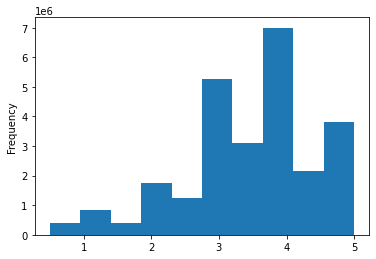

In [162]:
# Creates a histogram of the ratings data and identifies stats
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()